In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import sinica_treebank# 带标注的中文语料库
from nltk.book import *
import scipy.stats

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [58]:
df1=pd.read_excel('../sample1/coded1.xlsx')
df0=pd.read_excel('../sample2/coded2.xlsx')
df2=pd.read_excel('../sample3/newcoded3.xlsx')
df3=pd.read_excel('../sample3/coded3.xlsx')
df0 = df0.dropna(axis=0,subset = ["消息源-政府部门及官员"]) 
df1 = df1.dropna(axis=0,subset = ["消息源-政府部门及官员"])[]
df2 = df2.dropna(axis=0,subset = ["消息源-政府部门及官员"]) 
df3 = df3.dropna(axis=0,subset = ["消息源-政府部门及官员"]) 

In [59]:
print(df0.shape,df1.shape,df2.shape,df3.shape)

(90, 41) (107, 41) (100, 41) (42, 41)


In [81]:
df = pd.concat([df0,df1,df2,df3])

In [82]:
df=df.drop_duplicates(subset='index')

In [83]:
df=df.head(308)

In [84]:
ls = ['info_source','news_source','identity','single_story','tone','home','frame','cons']
info = list(df.columns)[3:10]
news = list(df.columns)[10:14]
identity = list(df.columns)[14:22]
single =list(df.columns)[22:24]
tone =list(df.columns)[24:27]
home = list(df.columns)[27:29]
frame = list(df.columns)[29:37]
cons=list(df.columns)[37:]

In [85]:
df['cons_01']=0
for i in cons:
    df['cons_01']= df[i]+df['cons_01']
cons_news_df = df[df['cons_01'].isin([1,2,3,4])]
noncons_news_df = df[df['cons_01'].isin([0])]
print(cons_news_df.shape,noncons_news_df.shape)

(178, 42) (129, 42)


In [86]:
#建设性新闻的词云，与非建设性新闻的差异
origin1 = pd.read_csv('../sample1/shut_sample1.csv')
origin2 = pd.read_csv('../sample2/shut_sample2.csv',lineterminator='\n')
origin3 = pd.read_csv('../sample3/shut_sample3.csv')

origin=pd.concat([origin1,origin2,origin3])


In [87]:
origin.columns

Index(['index', 'date', 'title', 'news_cut', 'emotion', 'news', 'comment_num'], dtype='object')

In [88]:
origin=origin[['index','date','news_cut', 'emotion','news', 'comment_num']]

In [89]:
cons_news_df = pd.merge(cons_news_df,origin,on=['index','date'],how='inner')
noncons_news_df = pd.merge(noncons_news_df,origin,on=['index','date'],how='inner')

In [90]:
cons_news_df['words_num']=cons_news_df['news'].map(lambda x: len(x))
noncons_news_df['words_num']=noncons_news_df['news'].map(lambda x: len(x))

In [91]:
cons_news_df.shape[0]+noncons_news_df.shape[0]

307

In [92]:
print(np.mean(cons_news_df['words_num']),np.mean(noncons_news_df['words_num']))

4316.348314606742 3122.7751937984494


In [93]:
#正态性检验
a = np.array(cons_news_df['words_num'].values)
b = np.array(noncons_news_df['words_num'].values)

In [94]:
#控制字数的差异，独立样本T检验
print(scipy.stats.kstest(a,'norm'))
print(scipy.stats.kstest(b,'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


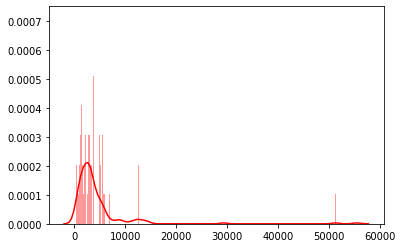

In [95]:
sns.set_palette("hls")
sns.distplot(a,color="r",bins=1000,kde=True)
plt.show()

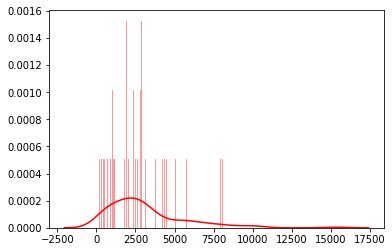

In [96]:
sns.set_palette("hls")
sns.distplot(b,color="r",bins=1000,kde=True)
plt.show()

In [97]:
scipy.stats.shapiro(b) #不是正态分布

(0.8564651012420654, 7.570837290415966e-10)

In [98]:
stats.levene(a,b)
#方差齐性检验是齐方差 p>0.05

LeveneResult(statistic=2.152234190374109, pvalue=0.14339294401178557)

In [101]:
scipy.stats.ttest_ind(a,b, equal_var=True, nan_policy='propagate') #字数有显著差异<.05，需要控制

Ttest_indResult(statistic=2.046282246458366, pvalue=0.04158576944514791)

In [102]:
noncons_cut=[]
cons_cut=[]
for cut in list(cons_news_df['news_cut']):
    cons_cut.extend(cut.lstrip("['").rstrip("']").split("', '"))
    
for cut in list(noncons_news_df['news_cut']):
    noncons_cut.extend(cut.lstrip("['").rstrip("']").split("', '"))


In [103]:
#导入停词表
stopwords=[]
with open('/Users/olivia_wei/Desktop/课程论文/媒体数据挖掘/diary_covid/chineseStopWords.txt','r',encoding='gbk') as file:
    stopwords_text = file.read()
    for line in stopwords_text:
        stopwords.append(line.strip())
new_stopwords = ['标题','因为','问题','没有','一个','然后','号','日','月','如果','但是','不是','可以',
                '所以','虽然','而且','应该','比如',"责任编辑","related","height","hqimg",
                 "left","padding","事件","亿元","表示","相关"]
too_popular = ['疫情', '武汉','医院','企业','中国']
stopwords.extend(new_stopwords)
stopwords.extend(too_popular)

In [104]:
#delete stopwords
def de_Stopwords(cut):
    for i,value in enumerate(cut):
        if value in stopwords:
            del cut[i]
    return cut

In [105]:
noncons_cut=de_Stopwords(noncons_cut)
cons_cut=de_Stopwords(cons_cut)

In [106]:
#用词频统计的结果制作词云
def wc_from_word_count(word_count, fp):
    word_count = Counter(word_count)
    wc = WordCloud(font_path='/Users/olivia_wei/Library/Fonts/msyh.ttf',
        max_words=300,  # 最多显示词数
        max_font_size=100,  # 字体最大值
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 1500,  # 设置图片的宽度
        height= 960,  # 设置图片的高度
        margin= 10  # 设置图片的边缘
    )
    wc.generate_from_frequencies(word_count)  # 从字典生成词云
    plt.imshow(wc)  # 显示词云
    plt.axis('off')  # 关闭坐标轴
    plt.show()  # 显示图像
    wc.to_file(fp)  # 保存图片

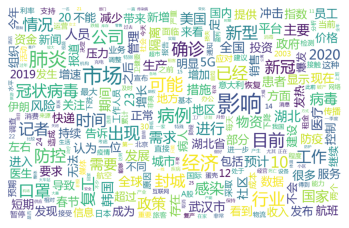

In [107]:
wc_from_word_count(noncons_cut,'word_cloud_noncons_result.png')

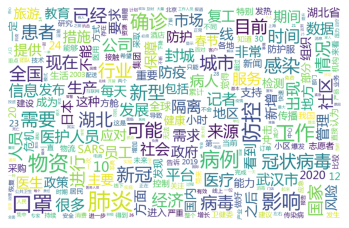

In [109]:
wc_from_word_count(cons_cut,'word_cloud_cons_result.png')

In [110]:
import random

In [111]:
print(len(cons_cut),len(noncons_cut))

224256 118548


In [112]:
cons_raw=random.sample(cons_cut,100000)
noncons_raw=random.sample(noncons_cut,100000)

In [113]:
cons_raw = ' '.join(cons_raw).encode('utf-8').decode('utf-8')

In [114]:
# 用print输出本地字符格式
def dump_result(result):
    for item in result:
        print (item[0],",",item[1])
        print()


In [115]:
tokens1 = nltk.word_tokenize(cons_raw)
sents = sinica_treebank.tagged_sents()# 以句为单位标

t0 = nltk.DefaultTagger('NN')# 词性的默认值为名词
t1 = nltk.UnigramTagger(sents, backoff=t0)# 一元标注
t2 = nltk.BigramTagger(sents, backoff=t1)# 多元（二元）标注

plts1=nltk.FreqDist(t2.tag(tokens1))
d1=dict(plts1)
distribution1 = []
for key in d1.keys():  #遍历字典，每一类词性的总次数一目了然
    a = [key[1][0],d1[key]]
    #print(a)
    distribution1.append(a)

In [116]:
tag_dis1 = pd.DataFrame(distribution1, columns=['tag', 'num']) 
tag_dis1 = tag_dis1.groupby('tag').sum().reset_index()

In [117]:
tag_dis1

,tag,num
0,A,728
1,C,24
2,D,3080
3,N,88510
4,P,9
5,V,8019


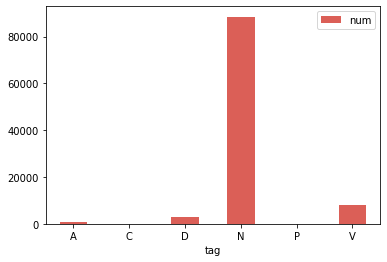

In [118]:
#barchart
tag_dis1.plot.bar(x='tag', y='num', rot=0)

In [119]:
noncons_raw = ' '.join(noncons_raw).encode('utf-8').decode('utf-8')
tokens2 = nltk.word_tokenize(noncons_raw)

plts2=nltk.FreqDist(t2.tag(tokens2))
d2=dict(plts2)
distribution2 = []
for key in d2.keys():  #遍历字典，每一类词性的总次数一目了然
    a = [key[1][0],d2[key]]
    #print(a)
    distribution2.append(a)
    # 等标注的词，以空格分词（分词问题不在此讨论）

tag_dis2 = pd.DataFrame(distribution2, columns=['tag', 'num']) 
tag_dis2 = tag_dis2.groupby('tag').sum().reset_index()


In [120]:
tag_dis2

,tag,num
0,A,703
1,C,29
2,D,2901
3,N,89639
4,P,6
5,V,7468


In [137]:
tag_dis= pd.merge(tag_dis1,tag_dis2,on='tag')
tag_dis=tag_dis.rename(columns={'num_x':'cons','num_y':'noncons'})

In [138]:
tag_dis['difference']=tag_dis['cons']-tag_dis['noncons']
'''
A:adjective
C:consjunction
D：adverb
N:none
P:prepositional
V：verb
'''

'\nA:adjective\nC:consjunction\nD：adverb\nN:none\nP:prepositional\nV：verb\n'

In [139]:
tag_dis

,tag,cons,noncons,difference
0,A,728,703,25
1,C,24,29,-5
2,D,3080,2901,179
3,N,88510,89639,-1129
4,P,9,6,3
5,V,8019,7468,551


In [140]:
c=tag_dis.iloc[:]['cons'].values
#cc = list(filter(lambda x : x >10, c))
nc=tag_dis.iloc[:]['noncons'].values
#ncc = list(filter(lambda x : x >10, nc))

In [141]:
f_obs = np.array([c,nc])

In [142]:
np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs,correction=False)[0:3])

(32.921262401435285, 3.901368338435375e-06, 5)


In [134]:
cons

['建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）',
 '建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）',
 '是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）',
 '建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）']

In [136]:
for i in range(4):
    data = df[df['cons_01']==i]
    print(cons[i]+str(data.shape[0]))

建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）129
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）117
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）55
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）6
